<a href="https://colab.research.google.com/github/subshr4/subshr4/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exam 1

Subani shrestha


CPSMA 4313

1. Gather the table on 8000 km mountains from the wikipedia page https://en.wikipedia.org/wiki/List of mountains by elevation

(a) (10 points) Store the data as a pandas dataframe

Here, I imported all the necessary library. Firstly, I imported pandas that is the library of python, then matplotlib.pyplot to plot a graph, then requests to gather raw HTML, BeaytifulSoup to parse the code, and numpy.

Then I entered the URL (Elevation of the mountain)provioded and used read_html command to pass it yo pandas and get a proper table.

Reference:

https://github.com/subshr4/subshr4/blob/main/quiz9.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/09_html_tables.ipynb


In [ ]:
import pandas as pa
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
from pandas.api.types import is_numeric_dtype

#importing all the necessary libraries

In [65]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation') 
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0] 

#read_html command is used here passed the HTML format to pandas dataframe.

df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


(b) (10 points) Return only mountains in the ‘Himalayas’

Here I'm using .loc function to get only mountains in the Himalauas.

In [79]:
new_df = df.loc[df[ 'Range' ]== 'Himalayas']
new_df



,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


(c) (10 points) Create a barchart of the Ranges

Here, firstly I used groupby command to form a table that is grouped by range. Then I plotted a bar graph with x axis as range and y axis as number of ranges.

Reference:
https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb

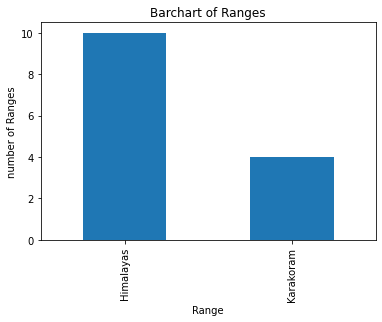

In [88]:
dfg = df.groupby(['Range'])['Range'].count()
dfg.plot(kind='bar', ylabel='number of Ranges', xlabel='Range', title='Barchart of Ranges')


(d) (10 points) Create a box-plot of the height in Feet

Here, I plotted a box-plot chart of the height in feet where x axis shows feet and y axis shows the height in feet.

Reference: https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb

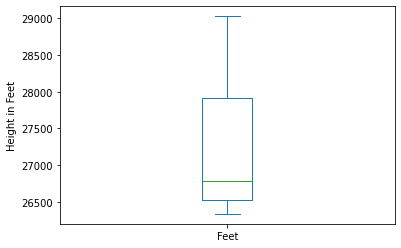

In [ ]:
df.Feet.plot(kind = 'box', ylabel='Height in Feet', xlabel='Feet') 


(e) (10 points) Report the mean, standard deviation and five number summary of the height in Feet

In [ ]:
df.Feet.mean() #mean of the height in feet
df.Feet.std()  #standard deviation of the height in feet
df.Feet.describe() #five number summary of height in feet

#Reference:https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

(f) (10 points) Report the mean and median of mountains when grouped by their Range.

Here, as the data under the range column are string so I used agg(mean_str)to get the mean of the string value and I used idmax to get the maximum one as the range.

In [ ]:
df.groupby('Range').agg(mean_str)

,Mountain,Metres,Feet,Location and Notes
Range,,,,
Himalayas,NaN,8319.70,27295.6,NaN
Karakoram,NaN,8194.25,26884.0,NaN


In [ ]:
df["Range"].value_counts().idxmax()

'Himalayas'

2. Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.

(a) (10 points) How many rows are in the dataset?

Firstly, I created my Google Cloud account, then imported authorization by pasting the link here through my google account. I created a new project (My project Exam) in the BigQuery. It's id is my-project-exam-341121 which I have used to navigate to the dataset chicago_taxi_trips.taxi_trips. Then I used the Count function to get the total numer of rows.

Reference:

https://github.com/subshr4/subshr4/blob/main/Quiz4.ipynb

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery --project my-project-exam-341121
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
Limit 3


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None


In [ ]:
%%bigquery --project my-project-exam-341121
SELECT 
  COUNT(*) as total_number_of_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_number_of_rows
0,198792903


(b) (10 points) What is the average trip total based on payment type?

Here, I used AVG command to get the average trip total based on payment type and grouped it by payment type.

In [ ]:
%%bigquery --project my-project-exam-341121

SELECT payment_type, AVG(trip_total) as avg_trip_based_on_payment_type

FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

GROUP BY payment_type


,payment_type,avg_trip_based_on_payment_type
0,Cash,12.265548
1,No Charge,15.836177
2,Credit Card,20.524892
3,Prcard,20.320682
4,Prepaid,22.377662
5,Way2ride,16.639366
6,Split,18.788039
7,Unknown,17.649893
8,Mobile,20.339910
9,Dispute,15.496588


(c) (10 points) How many trips, that had a non-zero recorded time, were above the average time?

Here, I used count command to get the total number of trips that had non zero recorded time that were above the average time. Then I used Where command to enter my condition that is trip seconds is not equal to zero and greater that average time.

In [83]:
%%bigquery --project my-project-exam-341121

SELECT COUNT(*) as Total_trips

FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)



,Total_trips
0,62143014


3. (10 points) Questions about the exam


(a) Approximately how long did you work on this exam?

- It took me around 3 hours to finish this exam.


(b) Which was the hardest and easiest topic from this section?

-The easiest one for me was creating barchart and boxplot whereas the hardest one was to find the total number of trips, that had a non-zero recorded time, were above the average time.


(c) Which method of gathering data are you most excited to use again?

- I am excited to use bigquery again where I can create my own project and access different bigquery public data and do different sql coding experiment with those data.



“I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.”